In [154]:
# FUNDMENTAL SETTING
import sys
#from time import time

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse
from matplotlib.patches import ConnectionPatch
from astropy.io import fits

#import scipy.special as special
#from scipy.special import wofz
#from scipy import integrate, interpolate

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

font = {'size':15}
mpl.rc('font', **font)
plt.rc('legend', fontsize=12)

In [46]:
# Input fitsfiles
def inputfits(target):
    if target == 'plasmoid_band3':
        singledish_file = 'AR_Band3_SPl_Referenceimages/uid___A002_Xade68e_X40f7_B3Spw3_SD_I.fits'
        synthesize_file = 'AR_Band3_SPl_Referenceimages/AR_SPl_B3AllSpw_I.fits'
        feathering_file = 'AR_Band3_SPl_Referenceimages/AR_SPl_B3AllSpw_I_Feather_K.fits'
    
    elif target == 'sunspot_band3':
        singledish_file = 'Sunspot_Band3_Referenceimages/AR12470_B3Spw3_SD_I.fits'
        synthesize_file = 'Sunspot_Band3_Referenceimages/AR12470_B3AllSpw_I.fits'
        feathering_file = 'Sunspot_Band3_Referenceimages/AR12470_B3AllSpw_I_Feather_K.fits'

    elif target == 'sunspot_band6':
        singledish_file = 'Sunspot_Band6_Referenceimages/AR12470_B6Spw3_SD_I.fits'
        synthesize_file = 'Sunspot_Band6_Referenceimages/AR12470_B6AllSpw_I.fits'
        feathering_file = 'Sunspot_Band6_Referenceimages/AR12470_B6AllSpw_I_Feather_K.fits'

    singledish_image = fits.open(singledish_file)
    synthesize_image = fits.open(synthesize_file)
    feathering_image = fits.open(feathering_file)
    
    return singledish_image, synthesize_image, feathering_image

In [183]:
# Showing fits header
singledish_image, synthesize_image, feathering_image = inputfits(target='plasmoid_band3')
singledish_image[0].header
#synthesize_image[0].header
#feathering_image[0].header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                  400                                                  
NAXIS2  =                  400                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   1.667247500000E-02                                                  
BMIN    =   1.667247500000E-02                                                  
BPA     =  -1.029051000000E+

1.0003484999999999 arcmin x 1.0003484999999999 arcmin
4.915595531462401 arcsec x 2.15830993652352 arcsec


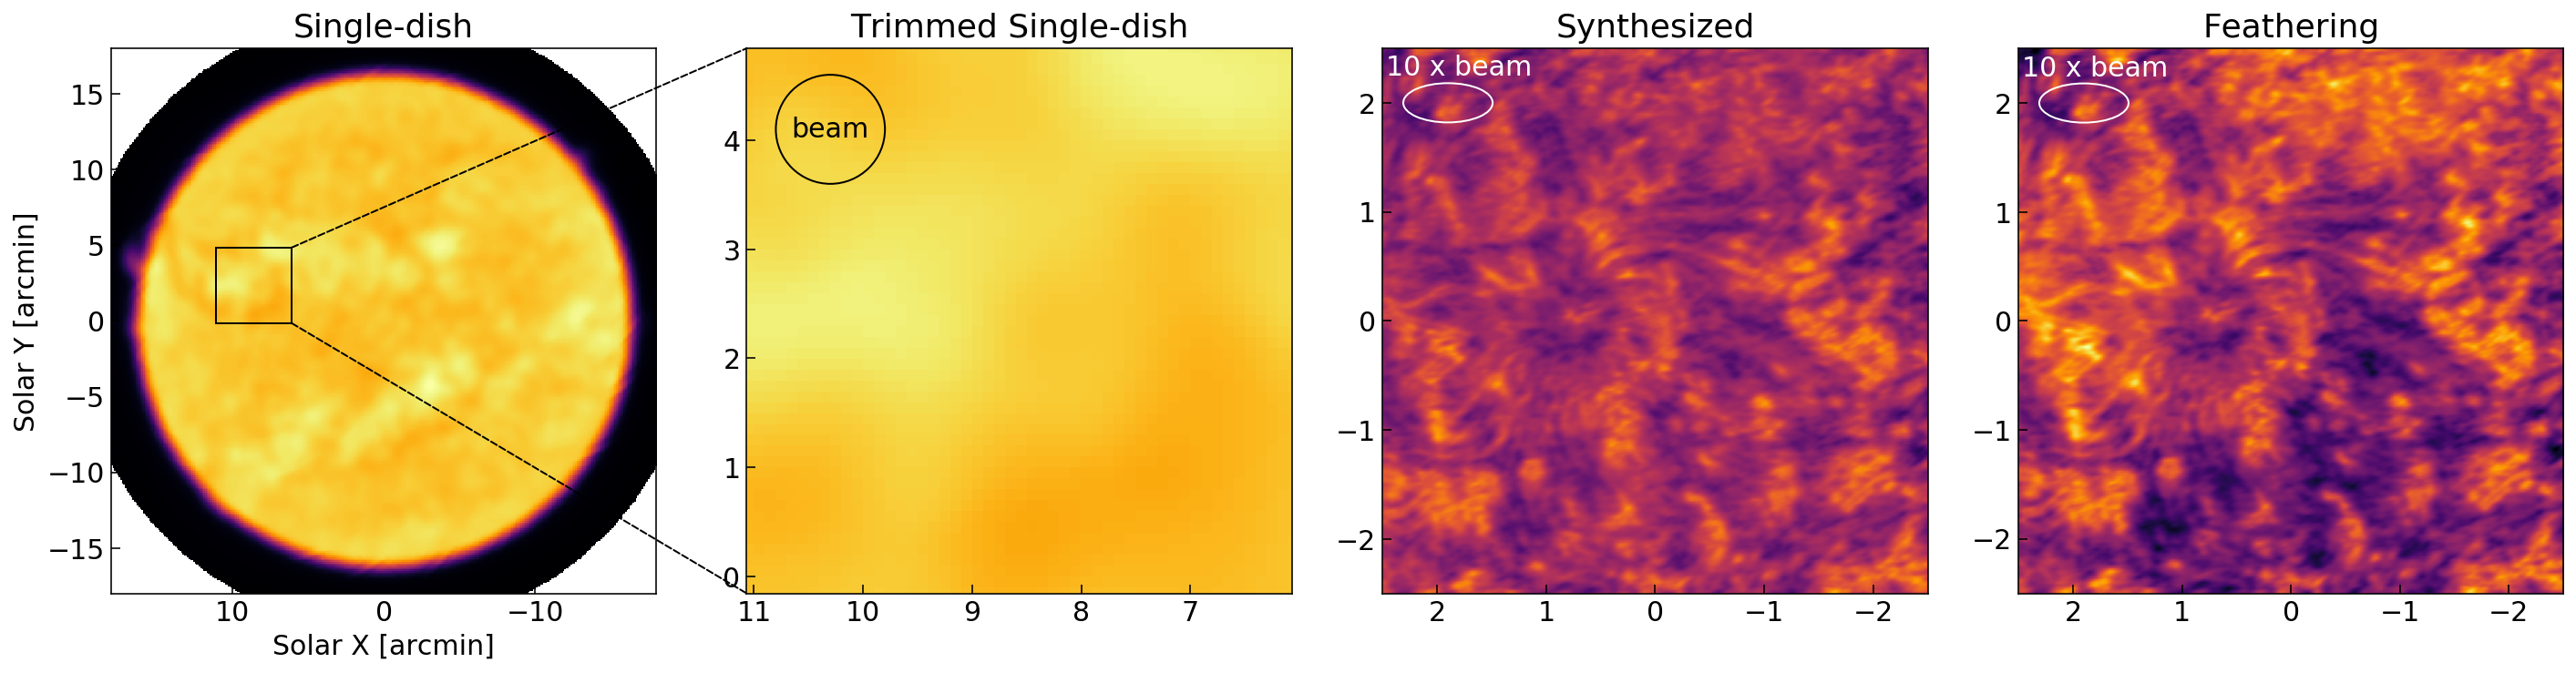

In [142]:
# Sunspot -band3
singledish_image, synthesize_image, feathering_image = inputfits(target='sunspot_band3') 
images = [singledish_image, singledish_image, synthesize_image, feathering_image]
str_images = ['Single-dish', 'Trimmed Single-dish', 'Synthesized', 'Feathering']

fig, ax = plt.subplots(1,4,figsize=(20,5))

for i, image, str_image in zip(range(4),images,str_images):
    dx, dy = image[0].header['CDELT1'], image[0].header['CDELT2'] # in degree
    dx, dy = 60*dx, 60*dy                                         # in arcmin
    #deg2Mm = 1.5e5 * np.pi/180
    #dx, dy = dx*deg2Mm, dy*deg2Mm                                 # in Mm
    nx, ny = image[0].header['NAXIS1'], image[0].header['NAXIS1'] # in pixels
    extent = np.array([-dx*nx/2, dx*nx/2, -dy*ny/2, dy*ny/2])
    
    ax[i].imshow(image[0].data[0,0,:,:,], origin='lower', interpolation='nearest', extent=extent, cmap='inferno')
    ax[i].tick_params(which='both', direction='in', length=5)
    ax[i].set_title(str_image)

ax[0].set_xlim(18,-18)
ax[0].set_ylim(-18,18)

cx = synthesize_image[0].header['CRVAL1'] - singledish_image[0].header['CRVAL1'] # in deg
cy = synthesize_image[0].header['CRVAL2'] - singledish_image[0].header['CRVAL2'] # in deg
cx, cy = cx*60, cy*60 # in arcmin
dd = 2.5

ax[0].add_patch(Rectangle((cx-dd,cy-dd), 2*dd, 2*dd, fill=False, edgecolor='black'))
con1 = ConnectionPatch(xyA=(cx-dd, cy+dd), coordsA=ax[0].transData, 
                       xyB=(cx+dd, cy+dd), coordsB=ax[1].transData, color = 'black', ls='--')
con2 = ConnectionPatch(xyA=(cx-dd, cy-dd), coordsA=ax[0].transData, 
                       xyB=(cx+dd, cy-dd), coordsB=ax[1].transData, color = 'black', ls='--')
fig.add_artist(con1)
fig.add_artist(con2)

# single-dish beam
width, height = singledish_image[0].header['BMAJ'], singledish_image[0].header['BMIN'] # in deg
width, height = 60*width, 60*height # in arcmin
print(f'{width} arcmin x {height} arcmin')
ax[1].add_patch(Ellipse((10.3,4.1), width, height, fill=False, edgecolor='black'))
ax[1].annotate('beam', (10.3,4.1), color='k', ha='center', va='center')

# synthesized beam
width, height = feathering_image[0].header['BMAJ'], feathering_image[0].header['BMIN'] # in deg
width, height = 60*width*10, 60*height*10 # in arcmin & 10 times expansion
print(f'{6*width} arcsec x {6*height} arcsec')
ax[2].add_patch(Ellipse((1.9,2), width, height, fill=False, edgecolor='white'))
ax[2].annotate('10 x beam', (1.8,2.2), color='w', ha='center', va='bottom')
ax[3].add_patch(Ellipse((1.9,2), width, height, fill=False, edgecolor='white'))
ax[3].annotate('10 x beam', (1.8,2.2), color='w', ha='center', va='bottom')

ax[1].set_xlim(cx+dd,cx-dd)
ax[1].set_ylim(cy-dd,cy+dd)
ax[2].set_xlim(dd,-dd)
ax[2].set_ylim(-dd,dd)

ax[0].set_xlabel('Solar X [arcmin]')
ax[0].set_ylabel('Solar Y [arcmin]')

plt.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=500)
plt.show()

0.44537346666666 arcmin x 0.44537346666666 arcmin
2.37959027290332 arcsec x 0.9156029224395599 arcsec


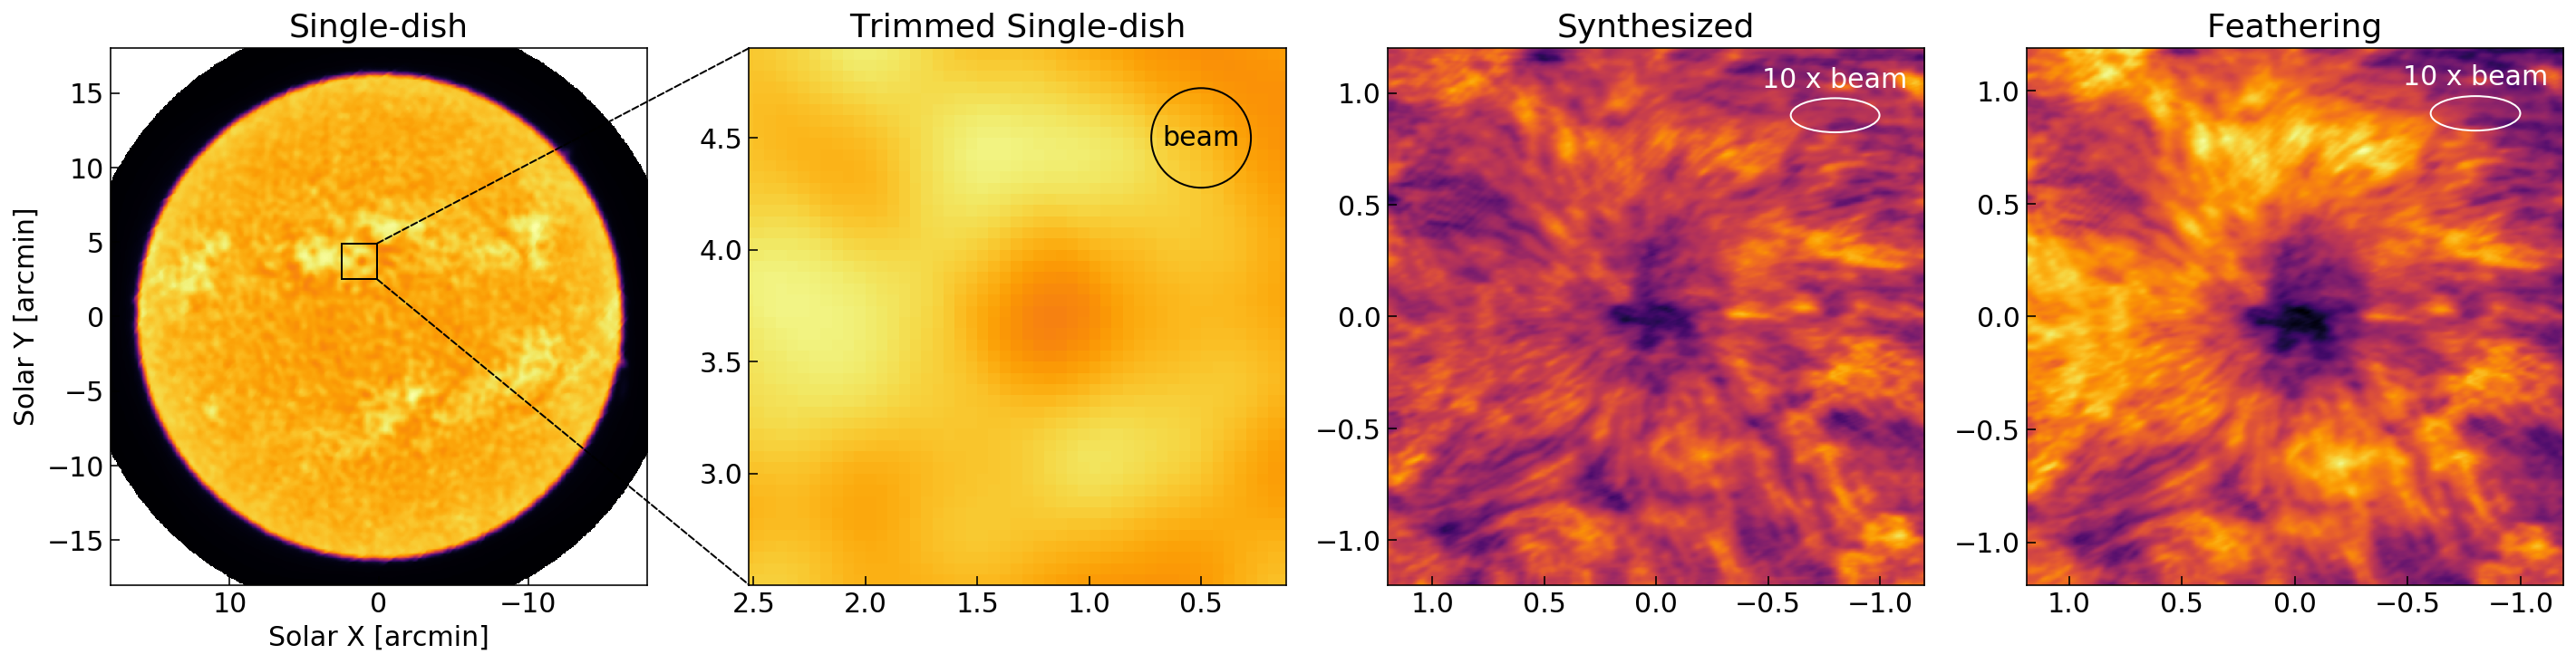

In [143]:
# Sunspot -band6
singledish_image, synthesize_image, feathering_image = inputfits(target='sunspot_band6') 
images = [singledish_image, singledish_image, synthesize_image, feathering_image]
str_images = ['Single-dish', 'Trimmed Single-dish', 'Synthesized', 'Feathering']

fig, ax = plt.subplots(1,4,figsize=(20,5))

for i, image, str_image in zip(range(4),images,str_images):
    dx, dy = image[0].header['CDELT1'], image[0].header['CDELT2'] # in degree
    dx, dy = 60*dx, 60*dy                                         # in arcmin
    #deg2Mm = 1.5e5 * np.pi/180
    #dx, dy = dx*deg2Mm, dy*deg2Mm                                 # in Mm
    nx, ny = image[0].header['NAXIS1'], image[0].header['NAXIS1'] # in pixels
    extent = np.array([-dx*nx/2, dx*nx/2, -dy*ny/2, dy*ny/2])
    
    ax[i].imshow(image[0].data[0,0,:,:,], origin='lower', interpolation='nearest', extent=extent, cmap='inferno')
    ax[i].tick_params(which='both', direction='in', length=5)
    ax[i].set_title(str_image)

ax[0].set_xlim(18,-18)
ax[0].set_ylim(-18,18)
cx = synthesize_image[0].header['CRVAL1'] - singledish_image[0].header['CRVAL1'] # in deg
cy = synthesize_image[0].header['CRVAL2'] - singledish_image[0].header['CRVAL2'] # in deg
cx, cy = cx*60, cy*60 # in arcmin
dd = 1.2

ax[0].add_patch(Rectangle((cx-dd+1,cy-dd), 2*dd, 2*dd, fill=False, edgecolor='black'))
con1 = ConnectionPatch(xyA=(cx-dd+1, cy+dd), coordsA=ax[0].transData, 
                       xyB=(cx+dd+1, cy+dd), coordsB=ax[1].transData, color = 'black', ls='--')
con2 = ConnectionPatch(xyA=(cx-dd+1, cy-dd), coordsA=ax[0].transData, 
                       xyB=(cx+dd+1, cy-dd), coordsB=ax[1].transData, color = 'black', ls='--')
fig.add_artist(con1)
fig.add_artist(con2)

# single-dish beam
width, height = singledish_image[0].header['BMAJ'], singledish_image[0].header['BMIN'] # in deg
width, height = 60*width, 60*height # in arcmin
print(f'{width} arcmin x {height} arcmin')
ax[1].add_patch(Ellipse((0.5,4.5), width, height, fill=False, edgecolor='black'))
ax[1].annotate('beam', (0.5,4.5), color='k', ha='center', va='center')

# synthesized beam
width, height = feathering_image[0].header['BMAJ'], feathering_image[0].header['BMIN'] # in deg
width, height = 60*width*10, 60*height*10 # in arcmin & 10 times expansion
print(f'{6*width} arcsec x {6*height} arcsec')
ax[2].add_patch(Ellipse((-0.8,0.9), width, height, fill=False, edgecolor='white'))
ax[2].annotate('10 x beam', (-0.8,1.), color='w', ha='center', va='bottom')
ax[3].add_patch(Ellipse((-0.8,0.9), width, height, fill=False, edgecolor='white'))
ax[3].annotate('10 x beam', (-0.8,1.), color='w', ha='center', va='bottom')

ax[1].set_xlim(cx+dd+1,cx-dd+1)
ax[1].set_ylim(cy-dd,cy+dd)
ax[2].set_xlim(dd,-dd)
ax[2].set_ylim(-dd,dd)

ax[0].set_xlabel('Solar X [arcmin]')
ax[0].set_ylabel('Solar Y [arcmin]')

plt.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=500)
plt.show()

1.0003484999999999 arcmin x 1.0003484999999999 arcmin
5.4890403747552 arcsec x 2.25174641609196 arcsec


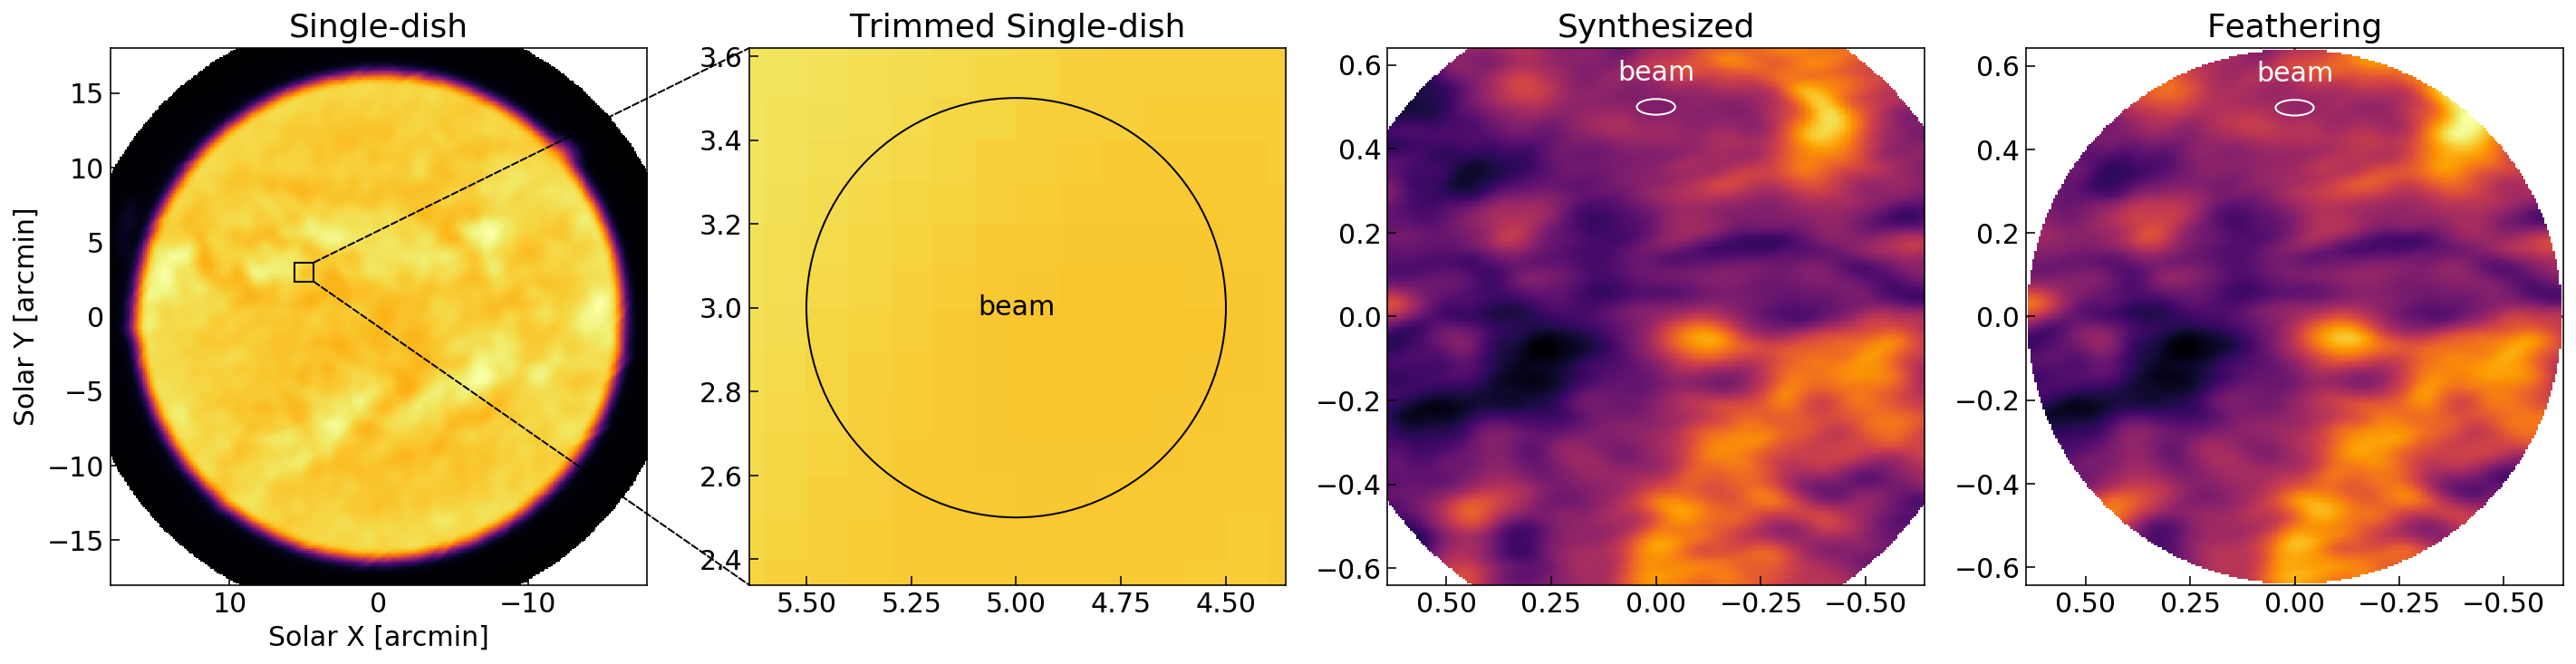

In [144]:
# Plasmoid -band3
singledish_image, synthesize_image, feathering_image = inputfits(target='plasmoid_band3') 
images = [singledish_image, singledish_image, synthesize_image, feathering_image]
str_images = ['Single-dish', 'Trimmed Single-dish', 'Synthesized', 'Feathering']

fig, ax = plt.subplots(1,4,figsize=(20,5))

for i, image, str_image in zip(range(4),images,str_images):
    dx, dy = image[0].header['CDELT1'], image[0].header['CDELT2'] # in degree
    dx, dy = 60*dx, 60*dy                                         # in arcmin
    #deg2Mm = 1.5e5 * np.pi/180
    #dx, dy = dx*deg2Mm, dy*deg2Mm                                 # in Mm
    nx, ny = image[0].header['NAXIS1'], image[0].header['NAXIS1'] # in pixels
    extent = np.array([-dx*nx/2, dx*nx/2, -dy*ny/2, dy*ny/2])
    
    ax[i].imshow(image[0].data[0,0,:,:,], origin='lower', interpolation='nearest', extent=extent, cmap='inferno')
    ax[i].tick_params(which='both', direction='in', length=5)
    ax[i].set_title(str_image)

ax[0].set_xlim(18,-18)
ax[0].set_ylim(-18,18)
cx = synthesize_image[0].header['CRVAL1'] - singledish_image[0].header['CRVAL1'] # in deg
cy = synthesize_image[0].header['CRVAL2'] - singledish_image[0].header['CRVAL2'] # in deg
cx, cy = cx*60, cy*60 # in arcmin
dd = 0.64

ax[0].add_patch(Rectangle((cx-dd,cy-dd), 2*dd,2*dd, fill=False, edgecolor='k'))
con1 = ConnectionPatch(xyA=(cx-dd, cy+dd), coordsA=ax[0].transData, 
                       xyB=(cx+dd, cy+dd), coordsB=ax[1].transData, color='k', ls='--')
con2 = ConnectionPatch(xyA=(cx-dd, cy-dd), coordsA=ax[0].transData, 
                       xyB=(cx+dd, cy-dd), coordsB=ax[1].transData, color='k', ls='--')
fig.add_artist(con1)
fig.add_artist(con2)

# single-dish beam
width, height = singledish_image[0].header['BMAJ'], singledish_image[0].header['BMIN'] # in deg
width, height = 60*width, 60*height # in arcmin
print(f'{width} arcmin x {height} arcmin')
ax[1].add_patch(Ellipse((5,3), width, height, fill=False, edgecolor='black'))
ax[1].annotate('beam', (5,3), color='k', ha='center', va='center')

# synthesized beam
width, height = feathering_image[0].header['BMAJ'], feathering_image[0].header['BMIN'] # in deg
width, height = 60*width, 60*height # in arcmin
print(f'{60*width} arcsec x {60*height} arcsec')
ax[2].add_patch(Ellipse((0,0.5), width, height, fill=False, edgecolor='white'))
ax[2].annotate('beam', (0,0.55), color='w', ha='center', va='bottom')
ax[3].add_patch(Ellipse((0,0.5), width, height, fill=False, edgecolor='white'))
ax[3].annotate('beam', (0,0.55), color='w', ha='center', va='bottom')

ax[1].set_xlim(cx+dd,cx-dd)
ax[1].set_ylim(cy-dd,cy+dd)
ax[2].set_xlim(dd,-dd)
ax[2].set_ylim(-dd,dd)

ax[0].set_xlabel('Solar X [arcmin]')
ax[0].set_ylabel('Solar Y [arcmin]')

plt.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=500)
plt.show()

1.0003484999999999 arcmin x 1.0003484999999999 arcmin
4.915595531462401 arcsec x 2.15830993652352 arcsec


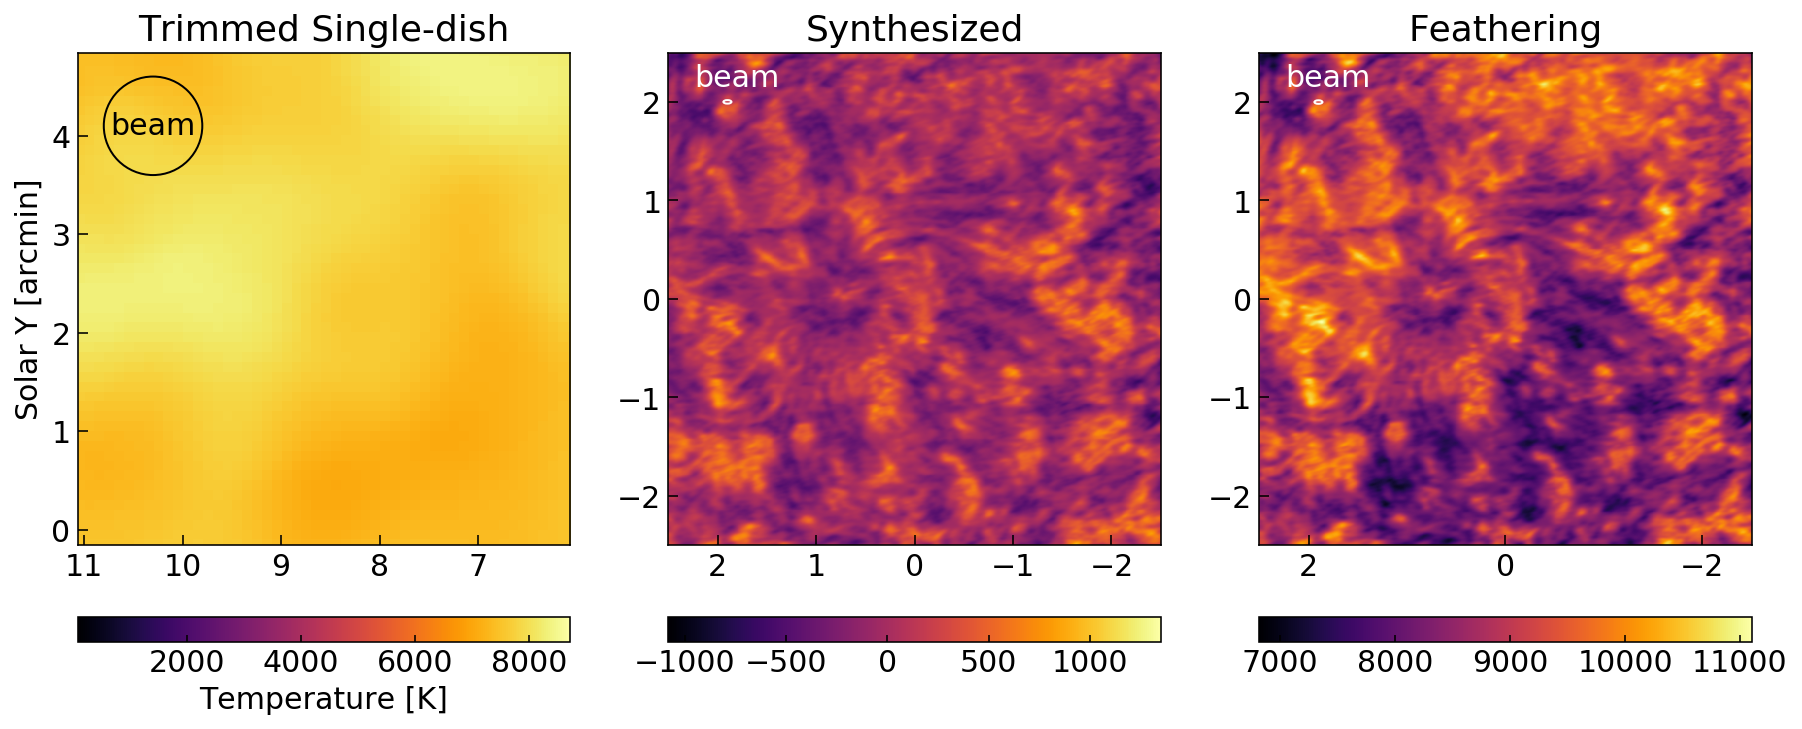

In [187]:
# Plasmoid -band3
singledish_image, synthesize_image, feathering_image = inputfits(target='sunspot_band3') 
images = [singledish_image, synthesize_image, feathering_image]
str_images = ['Trimmed Single-dish', 'Synthesized', 'Feathering']

beam = synthesize_image[0].header['BMAJ'] * synthesize_image[0].header['BMAJ'] * 60**4 # in arcsec^2
synthesize_image[0].data[0,0,:,:] = synthesize_image[0].data[0,0,:,:] * 13.6 * 9 / beam # in K

fig, ax = plt.subplots(1,3,figsize=(15,6))

for i, image, str_image in zip(range(3),images,str_images):
    dx, dy = image[0].header['CDELT1'], image[0].header['CDELT2'] # in degree
    dx, dy = 60*dx, 60*dy                                         # in arcmin
    #deg2Mm = 1.5e5 * np.pi/180
    #dx, dy = dx*deg2Mm, dy*deg2Mm                                 # in Mm
    nx, ny = image[0].header['NAXIS1'], image[0].header['NAXIS1'] # in pixels
    extent = np.array([-dx*nx/2, dx*nx/2, -dy*ny/2, dy*ny/2])
    
    im = ax[i].imshow(image[0].data[0,0,:,:,], origin='lower', interpolation='nearest', extent=extent, cmap='inferno')
    ax[i].tick_params(which='both', direction='in', length=5)
    ax[i].set_title(str_image)
    
    divider = make_axes_locatable(ax[i])
    cax = divider.new_vertical(size="5%", pad=0.5, pack_start=True)
    fig.add_axes(cax)
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
    cbar.ax.tick_params(color='k', direction='in')
    if i==0: cbar.ax.set_xlabel('Temperature [K]')

cx = synthesize_image[0].header['CRVAL1'] - singledish_image[0].header['CRVAL1'] # in deg
cy = synthesize_image[0].header['CRVAL2'] - singledish_image[0].header['CRVAL2'] # in deg
cx, cy = cx*60, cy*60 # in arcmin
dd = 2.5

# single-dish beam
width, height = singledish_image[0].header['BMAJ'], singledish_image[0].header['BMIN'] # in deg
width, height = 60*width, 60*height # in arcmin
print(f'{width} arcmin x {height} arcmin')
ax[0].add_patch(Ellipse((10.3,4.1), width, height, fill=False, edgecolor='black'))
ax[0].annotate('beam', (10.3,4.1), color='k', ha='center', va='center')

# synthesized beam
width, height = feathering_image[0].header['BMAJ'], feathering_image[0].header['BMIN'] # in deg
width, height = 60*width, 60*height # in arcmin
print(f'{60*width} arcsec x {60*height} arcsec')
ax[1].add_patch(Ellipse((1.9,2), width, height, fill=False, edgecolor='white'))
ax[1].annotate('beam', (1.8,2.1), color='w', ha='center', va='bottom')
ax[2].add_patch(Ellipse((1.9,2), width, height, fill=False, edgecolor='white'))
ax[2].annotate('beam', (1.8,2.1), color='w', ha='center', va='bottom')

ax[0].set_xlim(cx+dd,cx-dd)
ax[0].set_ylim(cy-dd,cy+dd)
ax[1].set_xlim(dd,-dd)
ax[1].set_ylim(-dd,dd)

ax[0].set_ylabel('Solar Y [arcmin]')

#plt.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=500)
plt.show()

1.0003484999999999 arcmin x 1.0003484999999999 arcmin
5.4890403747552 arcsec x 2.25174641609196 arcsec


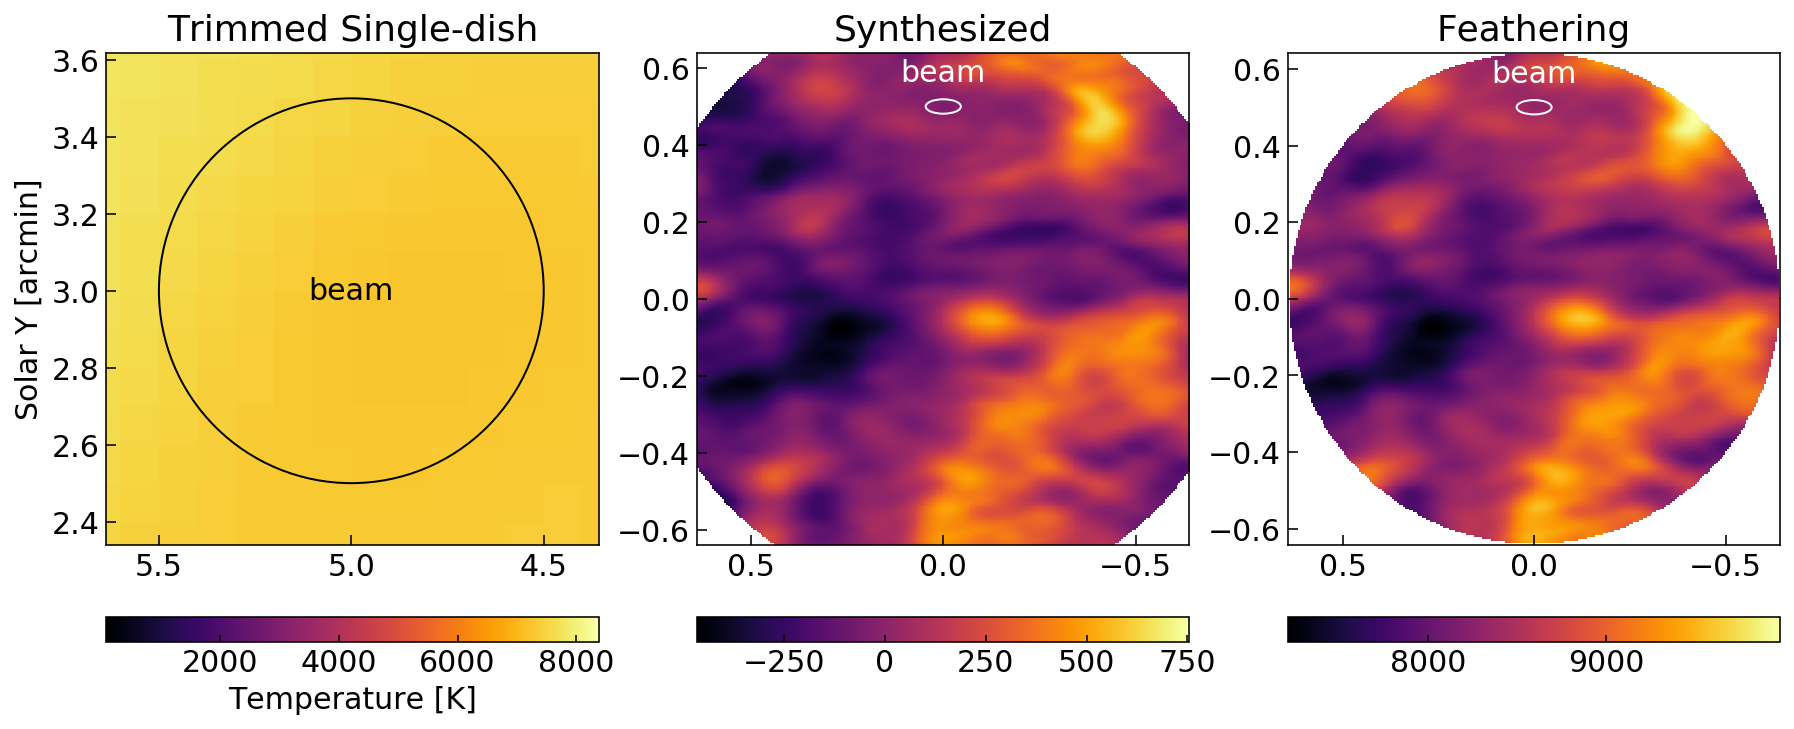

In [168]:
# Plasmoid -band3
singledish_image, synthesize_image, feathering_image = inputfits(target='plasmoid_band3') 
images = [singledish_image, synthesize_image, feathering_image]
str_images = ['Trimmed Single-dish', 'Synthesized', 'Feathering']

beam = synthesize_image[0].header['BMAJ'] * synthesize_image[0].header['BMAJ'] * 60**4 # in arcsec^2
synthesize_image[0].data[0,0,:,:] = synthesize_image[0].data[0,0,:,:] * 13.6 * 9 / beam # in K

fig, ax = plt.subplots(1,3,figsize=(15,6))

for i, image, str_image in zip(range(3),images,str_images):
    dx, dy = image[0].header['CDELT1'], image[0].header['CDELT2'] # in degree
    dx, dy = 60*dx, 60*dy                                         # in arcmin
    #deg2Mm = 1.5e5 * np.pi/180
    #dx, dy = dx*deg2Mm, dy*deg2Mm                                 # in Mm
    nx, ny = image[0].header['NAXIS1'], image[0].header['NAXIS1'] # in pixels
    extent = np.array([-dx*nx/2, dx*nx/2, -dy*ny/2, dy*ny/2])
    
    im = ax[i].imshow(image[0].data[0,0,:,:,], origin='lower', interpolation='nearest', extent=extent, cmap='inferno')
    ax[i].tick_params(which='both', direction='in', length=5)
    ax[i].set_title(str_image)
    
    divider = make_axes_locatable(ax[i])
    cax = divider.new_vertical(size="5%", pad=0.5, pack_start=True)
    fig.add_axes(cax)
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
    cbar.ax.tick_params(color='k', direction='in')
    if i==0: cbar.ax.set_xlabel('Temperature [K]')

cx = synthesize_image[0].header['CRVAL1'] - singledish_image[0].header['CRVAL1'] # in deg
cy = synthesize_image[0].header['CRVAL2'] - singledish_image[0].header['CRVAL2'] # in deg
cx, cy = cx*60, cy*60 # in arcmin
dd = 0.64

# single-dish beam
width, height = singledish_image[0].header['BMAJ'], singledish_image[0].header['BMIN'] # in deg
width, height = 60*width, 60*height # in arcmin
print(f'{width} arcmin x {height} arcmin')
ax[0].add_patch(Ellipse((5,3), width, height, fill=False, edgecolor='black'))
ax[0].annotate('beam', (5,3), color='k', ha='center', va='center')

# synthesized beam
width, height = feathering_image[0].header['BMAJ'], feathering_image[0].header['BMIN'] # in deg
width, height = 60*width, 60*height # in arcmin
print(f'{60*width} arcsec x {60*height} arcsec')
ax[1].add_patch(Ellipse((0,0.5), width, height, fill=False, edgecolor='white'))
ax[1].annotate('beam', (0,0.55), color='w', ha='center', va='bottom')
ax[2].add_patch(Ellipse((0,0.5), width, height, fill=False, edgecolor='white'))
ax[2].annotate('beam', (0,0.55), color='w', ha='center', va='bottom')

ax[0].set_xlim(cx+dd,cx-dd)
ax[0].set_ylim(cy-dd,cy+dd)
ax[1].set_xlim(dd,-dd)
ax[1].set_ylim(-dd,dd)

ax[0].set_ylabel('Solar Y [arcmin]')

#plt.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=500)
plt.show()

In [149]:
# Kim et al. (2017, ApJ) calculation
T_plasma = 1e7 # in K
T_bright = 1e5 # in K
freq = 1.7e10 # in Hz
z_fa = 2.3e9 # in cm

tau = lambda EM, T, v: 9.786e-3*EM*np.log(4.7e10*T/v)/v**2/T**1.5
EM = T_bright * freq**2 * T_plasma**1.5 / (T_plasma * 9.786e-3 * np.log(4.7e10*T_plasma/freq))
ne = (EM/z_fa)**0.5

print(f'Emission Measure = {EM:.3e} cm^-5')
print(f'optical depth = {tau(EM,T_plasma,freq):.3e}')
print(f'N_e = {ne:.3e} cm^-3')

Emission Measure = 5.450e+29 cm^-5
optical depth = 1.000e-02
N_e = 1.539e+10 cm^-3


In [150]:
# Application to the plasmoid based on Kim et al. (2017, ApJ) calculation
T_plasma = 1e6 # in K
T_bright = 1e4 # in K
freq = 1e11 # in Hz
z = 3e8 # in cm

tau = lambda EM, T, v: 9.786e-3*EM*np.log(4.7e10*T/v)/v**2/T**1.5
EM = T_bright * freq**2 * T_plasma**1.5 / (T_plasma * 9.786e-3 * np.log(4.7e10*T_plasma/freq))
ne = (EM/z_fa)**0.5

print(f'Emission Measure = {EM:.3e} cm^-5')
print(f'optical depth = {tau(EM,T_plasma,freq):.3e}')
print(f'N_e = {ne:.3e} cm^-3')

Emission Measure = 7.824e+29 cm^-5
optical depth = 1.000e-02
N_e = 5.107e+10 cm^-3


5.4890403747552 arcsec x 2.25174641609196 arcsec


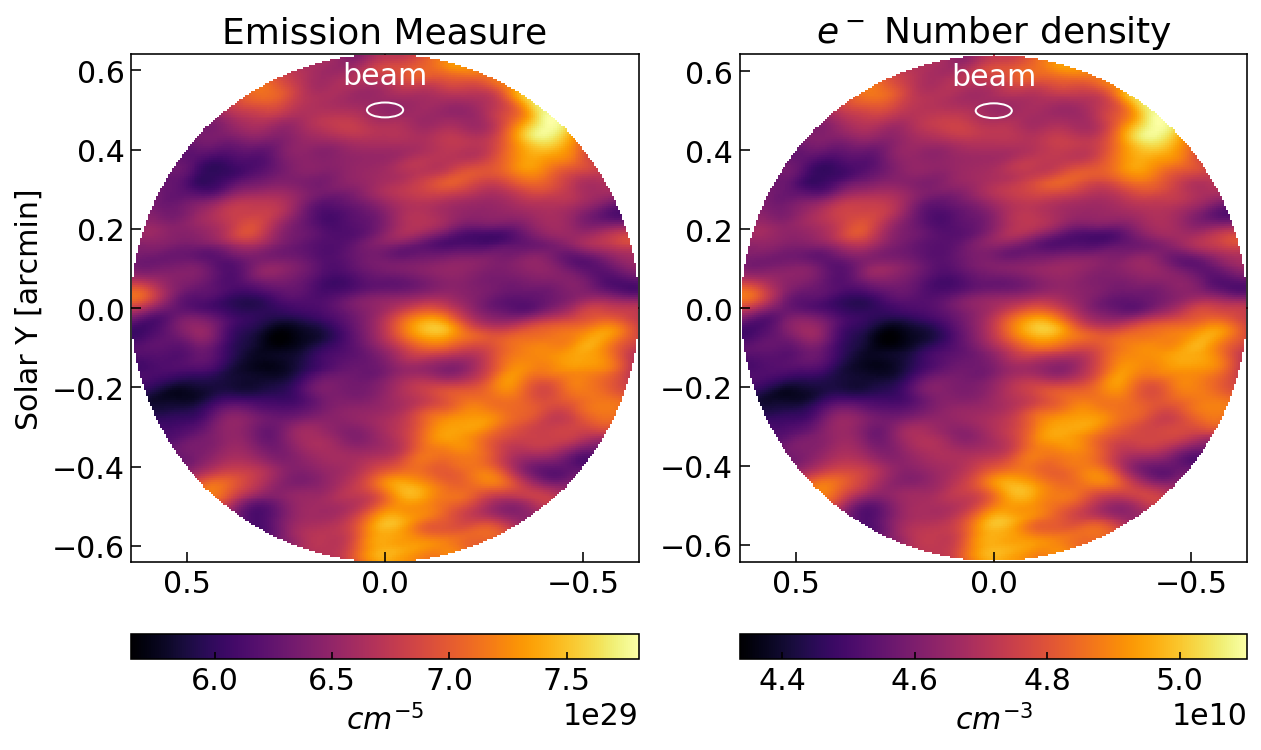

In [174]:
# Calculation of EM, N_e
T_plasma = 1e6 # in K
v = 1e11 # in Hz
z = 3e8 # in cm
fEM = lambda T: T * v**2 * T_plasma**1.5 / (T_plasma * 9.786e-3 * np.log(4.7e10*T_plasma/v))

# Plasmoid -band3
singledish_image, synthesize_image, feathering_image = inputfits(target='plasmoid_band3')

EM = fEM(feathering_image[0].data[0,0,:,:])
Ne = (EM/z)**0.5
images = [EM, Ne]
str_images = ['Emission Measure', r'$e^-$ Number density']
str_units = [r'$cm^{-5}$', r'$cm^{-3}$']

fig, ax = plt.subplots(1,2,figsize=(10,6))

for i, image, str_image, str_unit in zip(range(2),images,str_images,str_units):
    dx, dy = feathering_image[0].header['CDELT1'], feathering_image[0].header['CDELT2'] # in degree
    dx, dy = 60*dx, 60*dy                                         # in arcmin
    #deg2Mm = 1.5e5 * np.pi/180
    #dx, dy = dx*deg2Mm, dy*deg2Mm                                 # in Mm
    nx, ny = feathering_image[0].header['NAXIS1'], feathering_image[0].header['NAXIS1'] # in pixels
    extent = np.array([-dx*nx/2, dx*nx/2, -dy*ny/2, dy*ny/2])
    
    im = ax[i].imshow(image, origin='lower', interpolation='nearest', extent=extent, cmap='inferno')
    ax[i].tick_params(which='both', direction='in', length=5)
    ax[i].set_title(str_image)
    
    divider = make_axes_locatable(ax[i])
    cax = divider.new_vertical(size="5%", pad=0.5, pack_start=True)
    fig.add_axes(cax)
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
    cbar.ax.tick_params(color='k', direction='in')
    cbar.ax.set_xlabel(str_unit)

cx = synthesize_image[0].header['CRVAL1'] - singledish_image[0].header['CRVAL1'] # in deg
cy = synthesize_image[0].header['CRVAL2'] - singledish_image[0].header['CRVAL2'] # in deg
cx, cy = cx*60, cy*60 # in arcmin
dd = 0.64

# synthesized beam
width, height = feathering_image[0].header['BMAJ'], feathering_image[0].header['BMIN'] # in deg
width, height = 60*width, 60*height # in arcmin
print(f'{60*width} arcsec x {60*height} arcsec')
ax[0].add_patch(Ellipse((0,0.5), width, height, fill=False, edgecolor='white'))
ax[0].annotate('beam', (0,0.55), color='w', ha='center', va='bottom')
ax[1].add_patch(Ellipse((0,0.5), width, height, fill=False, edgecolor='white'))
ax[1].annotate('beam', (0,0.55), color='w', ha='center', va='bottom')

ax[0].set_xlim(dd,-dd)
ax[0].set_ylim(-dd,dd)

ax[0].set_ylabel('Solar Y [arcmin]')

#plt.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=500)
plt.show()

5.4890403747552 arcsec x 2.25174641609196 arcsec


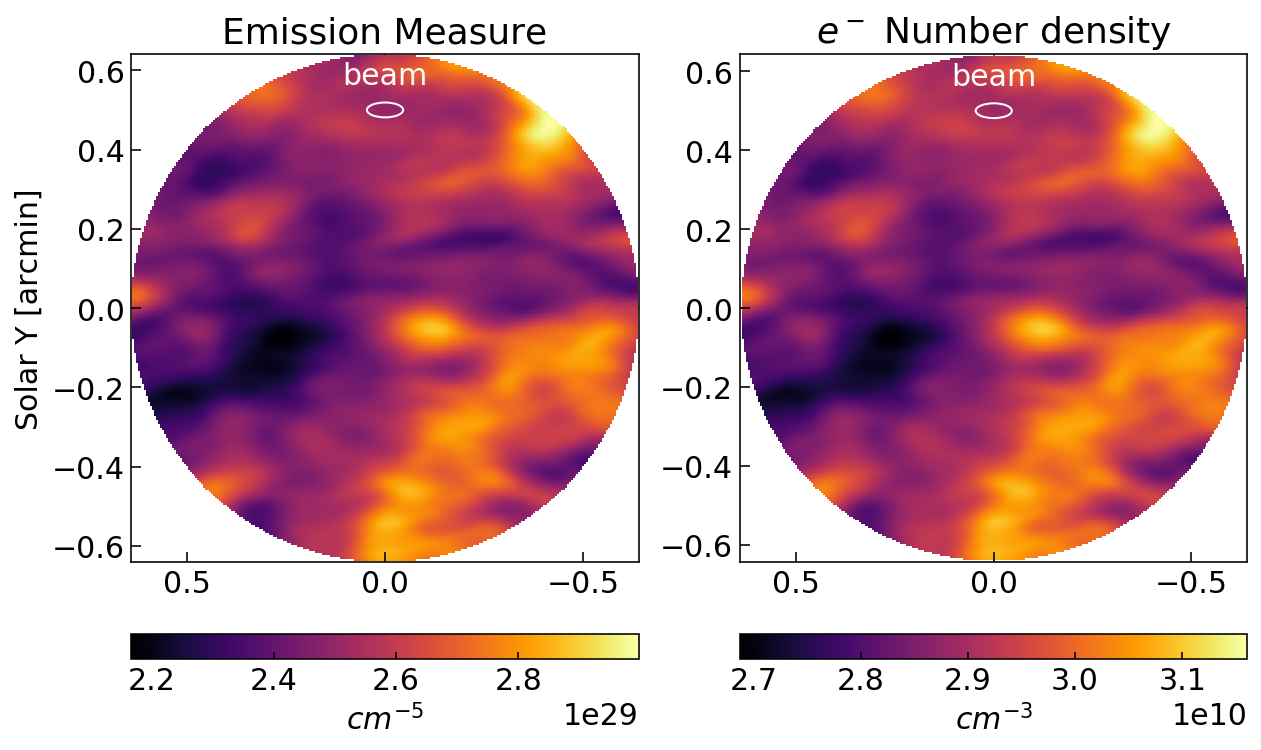

In [188]:
# Calculation of EM, N_e - Changing T_plasma
T_plasma = 10**5 # in K
v = 1e11 # in Hz
z = 3e8 # in cm
fEM = lambda T: T * v**2 * T_plasma**1.5 / (T_plasma * 9.786e-3 * np.log(4.7e10*T_plasma/v))

# Plasmoid -band3
singledish_image, synthesize_image, feathering_image = inputfits(target='plasmoid_band3')

EM = fEM(feathering_image[0].data[0,0,:,:])
Ne = (EM/z)**0.5
images = [EM, Ne]
str_images = ['Emission Measure', r'$e^-$ Number density']
str_units = [r'$cm^{-5}$', r'$cm^{-3}$']

fig, ax = plt.subplots(1,2,figsize=(10,6))

for i, image, str_image, str_unit in zip(range(2),images,str_images,str_units):
    dx, dy = feathering_image[0].header['CDELT1'], feathering_image[0].header['CDELT2'] # in degree
    dx, dy = 60*dx, 60*dy                                         # in arcmin
    #deg2Mm = 1.5e5 * np.pi/180
    #dx, dy = dx*deg2Mm, dy*deg2Mm                                 # in Mm
    nx, ny = feathering_image[0].header['NAXIS1'], feathering_image[0].header['NAXIS1'] # in pixels
    extent = np.array([-dx*nx/2, dx*nx/2, -dy*ny/2, dy*ny/2])
    
    im = ax[i].imshow(image, origin='lower', interpolation='nearest', extent=extent, cmap='inferno')
    ax[i].tick_params(which='both', direction='in', length=5)
    ax[i].set_title(str_image)
    
    divider = make_axes_locatable(ax[i])
    cax = divider.new_vertical(size="5%", pad=0.5, pack_start=True)
    fig.add_axes(cax)
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
    cbar.ax.tick_params(color='k', direction='in')
    cbar.ax.set_xlabel(str_unit)

cx = synthesize_image[0].header['CRVAL1'] - singledish_image[0].header['CRVAL1'] # in deg
cy = synthesize_image[0].header['CRVAL2'] - singledish_image[0].header['CRVAL2'] # in deg
cx, cy = cx*60, cy*60 # in arcmin
dd = 0.64

# synthesized beam
width, height = feathering_image[0].header['BMAJ'], feathering_image[0].header['BMIN'] # in deg
width, height = 60*width, 60*height # in arcmin
print(f'{60*width} arcsec x {60*height} arcsec')
ax[0].add_patch(Ellipse((0,0.5), width, height, fill=False, edgecolor='white'))
ax[0].annotate('beam', (0,0.55), color='w', ha='center', va='bottom')
ax[1].add_patch(Ellipse((0,0.5), width, height, fill=False, edgecolor='white'))
ax[1].annotate('beam', (0,0.55), color='w', ha='center', va='bottom')

ax[0].set_xlim(dd,-dd)
ax[0].set_ylim(-dd,dd)

ax[0].set_ylabel('Solar Y [arcmin]')

#plt.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=500)
plt.show()

5.4890403747552 arcsec x 2.25174641609196 arcsec


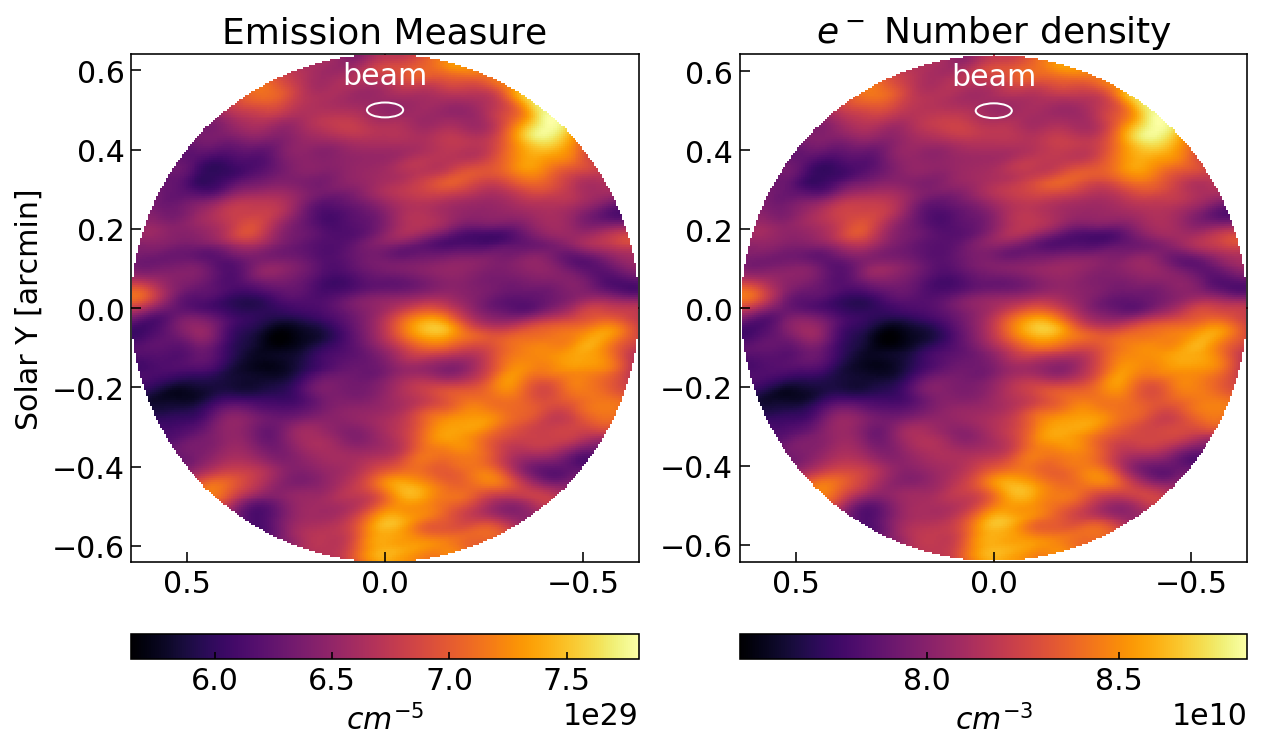

In [177]:
# Calculation of EM, N_e - Changing depth
T_plasma = 1e6 # in K
v = 1e11 # in Hz
z = 1e8 # in cm
fEM = lambda T: T * v**2 * T_plasma**1.5 / (T_plasma * 9.786e-3 * np.log(4.7e10*T_plasma/v))

# Plasmoid -band3
singledish_image, synthesize_image, feathering_image = inputfits(target='plasmoid_band3')

EM = fEM(feathering_image[0].data[0,0,:,:])
Ne = (EM/z)**0.5
images = [EM, Ne]
str_images = ['Emission Measure', r'$e^-$ Number density']
str_units = [r'$cm^{-5}$', r'$cm^{-3}$']

fig, ax = plt.subplots(1,2,figsize=(10,6))

for i, image, str_image, str_unit in zip(range(2),images,str_images,str_units):
    dx, dy = feathering_image[0].header['CDELT1'], feathering_image[0].header['CDELT2'] # in degree
    dx, dy = 60*dx, 60*dy                                         # in arcmin
    #deg2Mm = 1.5e5 * np.pi/180
    #dx, dy = dx*deg2Mm, dy*deg2Mm                                 # in Mm
    nx, ny = feathering_image[0].header['NAXIS1'], feathering_image[0].header['NAXIS1'] # in pixels
    extent = np.array([-dx*nx/2, dx*nx/2, -dy*ny/2, dy*ny/2])
    
    im = ax[i].imshow(image, origin='lower', interpolation='nearest', extent=extent, cmap='inferno')
    ax[i].tick_params(which='both', direction='in', length=5)
    ax[i].set_title(str_image)
    
    divider = make_axes_locatable(ax[i])
    cax = divider.new_vertical(size="5%", pad=0.5, pack_start=True)
    fig.add_axes(cax)
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
    cbar.ax.tick_params(color='k', direction='in')
    cbar.ax.set_xlabel(str_unit)

cx = synthesize_image[0].header['CRVAL1'] - singledish_image[0].header['CRVAL1'] # in deg
cy = synthesize_image[0].header['CRVAL2'] - singledish_image[0].header['CRVAL2'] # in deg
cx, cy = cx*60, cy*60 # in arcmin
dd = 0.64

# synthesized beam
width, height = feathering_image[0].header['BMAJ'], feathering_image[0].header['BMIN'] # in deg
width, height = 60*width, 60*height # in arcmin
print(f'{60*width} arcsec x {60*height} arcsec')
ax[0].add_patch(Ellipse((0,0.5), width, height, fill=False, edgecolor='white'))
ax[0].annotate('beam', (0,0.55), color='w', ha='center', va='bottom')
ax[1].add_patch(Ellipse((0,0.5), width, height, fill=False, edgecolor='white'))
ax[1].annotate('beam', (0,0.55), color='w', ha='center', va='bottom')

ax[0].set_xlim(dd,-dd)
ax[0].set_ylim(-dd,dd)

ax[0].set_ylabel('Solar Y [arcmin]')

#plt.tight_layout()
#plt.savefig('.pdf', format='pdf', dpi=500)
plt.show()

In [11]:
source = np.logical_and(hdu[0].data != np.nan, hdu[0].data > 0) 
data = hdu[0].data[source]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


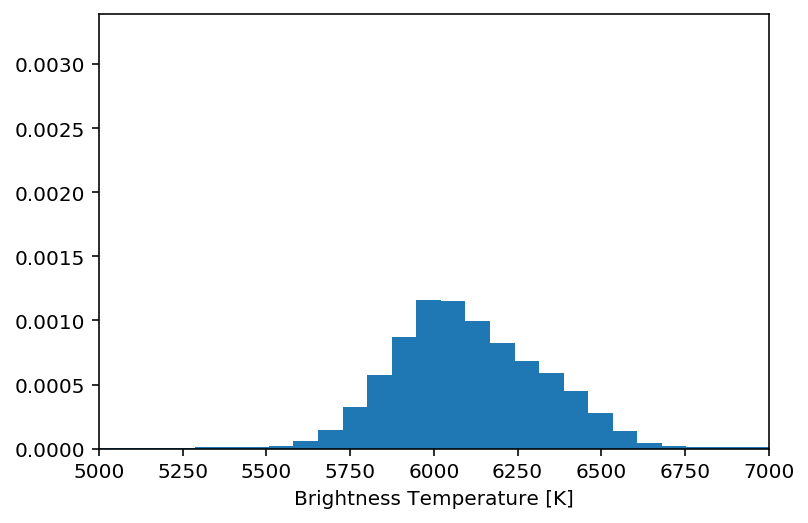

In [15]:
plt.hist(data, bins=100, density=True)
plt.xlabel('Brightness Temperature [K]')
plt.xlim(5000,7000)
plt.show()

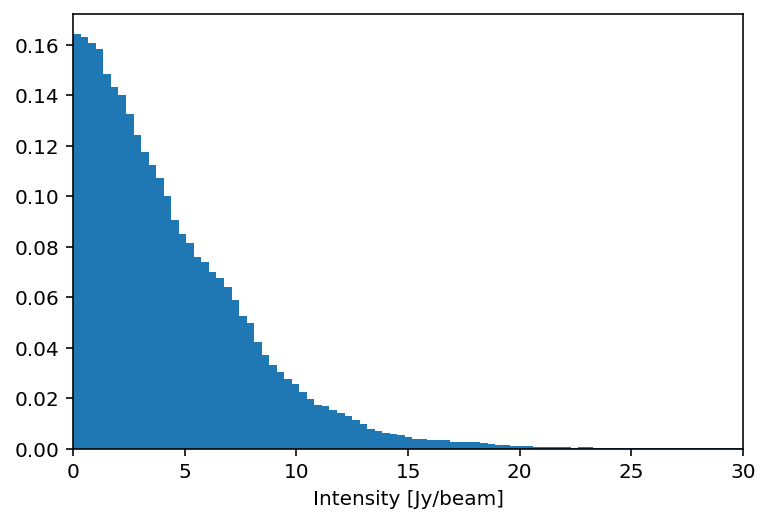

In [83]:
plt.hist(data, bins=100, density=True)
plt.xlabel('Intensity [Jy/beam]')
plt.xlim(0,30)
plt.show()

In [89]:
7e-23/1.13*(206265)**2/2/(1.38e-16)*0.323**2

996.2461162969149